---

# **Moore MKW - Goods Transfer Anomaly Detection**
### **A pilot project using Baks data**

### Moni IT & Consultancy

### Gert Wijnalda, M.M.J.D.T. Voeten

---

---

# **1.0 - Project Goal**

---





- Check whether transport data contains anomalies
- Check the transport company as well as the logistics services provider

---

# **2.0 - Dataset Description**

---

---

## 2.1 - Data Overview

---

This dataset contains 38551 transport records from Baks Logistiek spanning from 2010 to August 2025, encompassing both historical transactions and planned future shipments. The data represents comprehensive logistics operations including loading, transportation, and delivery of goods across multiple European countries.

---

## 2.2 - Business Context
---

**Primary Use Case**: Fraud detection and audit analysis for transport logistics operations
**Target Audience**: Auditing department of accounting firm
**Analysis Goal**: Identify anomalous patterns that may indicate fraudulent activities, billing irregularities, or operational misconduct

---

## 2.3 - Data Structure
---

- **Records**: 38,551 transport shipments
- **Original Features**: 136 variables
- **Processed Features**: 70 variables (after cleaning and feature engineering)
- **Memory Footprint**: Optimized from 58.84 MB to 54.06 MB
  
---

## 2.4 - Key Data Categories

---

Further details in 2.6 of this notebook.

### 2.4.1 -  **Transaction Identifiers**


- `Dossiernr`: Unique shipment identifier (34,735 unique values)
- `Volgnr`: Sequence number for multi-part shipments
- `Referentie`: External reference numbers


### 2.4.2 - **Geographic & Route Data**


- **Countries**: Netherlands (primary), Belgium, Germany, France, Italy, Spain, Austria, Sweden, Denmark
- **Coordinates**: GPS coordinates for loading and unloading addresses
- **Calculated Distance**: Haversine distance between coordinates
- **Reported Distance**: Official route distance from system


### 2.4.3 - **Cargo & Weight Information**


- **Products**: Primarily dairy products (milk powder, whey protein, cream)
- **Weight Measurements**: Loading weight, unloading weight, calculated weight
- **Volume**: Cargo volume and density measurements
- **ADR Classification**: Hazardous materials designation

### 2.4.4 - **Time & Duration Metrics**

- **Loading Operations**: Start/end times and duration
- **Unloading Operations**: Start/end times and duration  
- **Transport Times**: Planned vs actual delivery times
- **Financial Dates**: Invoice and processing dates

### 2.4.5 - **Financial Data**


- **Base Pricing**: Unit prices, fixed prices, total amounts
- **Additional Costs**: Fuel surcharges, extra fees, toll charges
- **Currency**: Euro (EUR) denominated
- **Cost Components**: Detailed breakdown of all charges

---

## 2.5 - Fraud-Relevant Anomaly Indicators

---


### 2.5.1 - Engineered Features for Anomaly Detection
1. **`afwijking_gewicht`**: Weight discrepancy between loading and unloading
2. **`afwijking_afstand`**: Distance variance between reported and calculated routes  
3. **Route Efficiency**: Deviation from optimal routing
   
---

### 2.5.2 - Potential Fraud Patterns

---


- **Weight Manipulation**: Systematic over/under-reporting of cargo weights
- **Route Inflation**: Reporting longer distances than actually traveled
- **Duplicate Billing**: Multiple charges for same route/service
- **Ghost Shipments**: Transactions without corresponding physical transport
- **Price Manipulation**: Unusual pricing patterns relative to distance/weight
- **Time Fraud**: Inflated loading/unloading durations


---

### 2.6 - Feature Descriptions


---


| Feature name                     | Category   | Description                                                                       |
|----------------------------------|------------|-----------------------------------------------------------------------------------|
| Dossiernr                        | Reference  | File number (reference ID for a shipment/case)                                    |
| Volgnr                           | Excluded   | Sequence number (internal ordering, not useful)                                   |
| Referentie                       | Excluded   | Generic reference field (duplicate, not useful)                                   |
| Zendingsoort                     | Included   | Type of shipment                                                                  |
| Klaar voor factuur                | Included   | Ready for invoice (boolean/flag)                                                  |
| Totaalbedrag                     | Included   | Total amount (€)                                                                  |
| Extra kosten bedrag               | Included   | Extra cost amount (€)                                                             |
| Brandstoftoesl. extra kosten      | Included   | Fuel surcharge extra costs (€)                                                    |
| Brandstoftoeslag bedrag           | Included   | Fuel surcharge amount (€)                                                         |
| Bedrag excl.                     | Included   | Amount excluding tax (€)                                                          |
| Eenheidsprijs                    | Included   | Unit price (€ per unit)                                                           |
| Vaste prijs                       | Included   | Fixed price (€)                                                                   |
| % Droge stof                      | Included   | Percentage of dry matter                                                          |
| Ph waarde                         | Included   | pH value of goods                                                                 |
| Eiwit                            | Excluded   | Protein content (not used)                                                        |
| Dossierreferentie                 | Reference  | Case reference number                                                             |
| Laadreferentie                    | Reference  | Loading reference number                                                          |
| CMR nr.                           | Reference  | CMR number (official transport document)                                          |
| Ritnr lossen                      | Reference  | Trip number for unloading                                                         |
| Laadgewicht                       | Included   | Load weight (kg)                                                                  |
| Losgewicht                        | Included   | Unload weight (kg)                                                                |
| Opdrachtgever                     | Included   | Client / customer                                                                 |
| Laadnaam                          | Included   | Loading name (site/party name)                                                    |
| Laadplaats                        | Included   | Loading place (city/location)                                                     |
| Laaddatum                         | Included   | Loading date                                                                      |
| Laadtijd                          | Included   | Loading time                                                                      |
| Laadpostcode                      | Excluded   | Loading postal code (not used)                                                    |
| Laadland                          | Included   | Loading country                                                                   |
| Losnaam                           | Included   | Unloading name (site/party name)                                                  |
| Losplaats                         | Included   | Unloading place (city/location)                                                   |
| Losdatum                          | Included   | Unloading date                                                                    |
| Lostijd                           | Included   | Unloading time                                                                    |
| Lospostcode                       | Excluded   | Unloading postal code (not used)                                                  |
| Losland                           | Included   | Unloading country                                                                 |
| Aantal                            | Included   | Quantity (number of units)                                                        |
| Eenheid                           | Included   | Unit (e.g., kg, pallet, liter)                                                    |
| CMR bij factuur                   | Included   | CMR with invoice (flag)                                                           |
| CMR ontvangen                     | Included   | CMR received (flag)                                                               |
| Afstand                           | Included   | Distance (km)                                                                     |
| Dichtheid                         | Excluded   | Density (not used)                                                                |
| Product                           | Included   | Product code/name                                                                 |
| Interne opmerkingen               | Included   | Internal remarks                                                                  |
| Chauffeur lossen                  | Excluded   | Driver unloading info (not used)                                                  |
| Ordersoort                        | Excluded   | Order type (not used)                                                             |
| Plangroep                         | Excluded   | Planning group (not used)                                                         |
| Gewicht                           | Included   | Weight (kg)                                                                       |
| Tariefaantal                      | Included   | Tariff quantity                                                                   |
| Afwijkend tariefaantal            | Excluded   | Deviating tariff quantity (not used)                                              |
| Tariefeenheid                     | Included   | Tariff unit (e.g., per km, per ton)                                               |
| CMR printen                       | Reference  | CMR print status                                                                  |
| Gecontroleerd                     | Reference  | Checked/verified flag                                                             |
| Factuurmethode                    | Reference  | Invoicing method                                                                  |
| Status                            | Included   | Shipment status                                                                   |
| Factuurcode                       | Reference  | Invoice code                                                                      |
| Crediteur laden                   | Reference  | Creditor loading                                                                 |
| Truck lossen                      | Reference  | Truck unloading reference                                                         |
| Trailer lossen                    | Reference  | Trailer unloading reference                                                       |
| Crediteur lossen                  | Reference  | Creditor unloading                                                               |
| Debiteur                          | Excluded   | Debtor (not used)                                                                 |
| Departement                       | Reference  | Department reference                                                              |
| Week                              | Excluded   | Week number (not used)                                                            |
| Factuuropmerkingen                | Excluded   | Invoice remarks (not used)                                                        |
| Losadres1                         | Reference  | Unloading address line 1                                                          |
| Losadres2                         | Reference  | Unloading address line 2                                                          |
| Laadadres2                        | Reference  | Loading address line 2                                                            |
| Factuurnr                         | Reference  | Invoice number                                                                    |
| Contactpersoon                    | Reference  | Contact person                                                                    |
| # afwijkingen                      | Included   | Number of deviations                                                              |
| Laadopmerkingen                   | Included   | Loading remarks                                                                   |
| Losopmerkingen                    | Included   | Unloading remarks                                                                 |
| Coördinaten laadadres handmatig   | Excluded   | Manual coordinates loading address (not used)                                     |
| Coördinaten losadres handmatig    | Excluded   | Manual coordinates unloading address (not used)                                   |
| Geochecksum laadadres             | Excluded   | Geochecksum loading address (not used)                                            |
| Geochecksum losadres              | Excluded   | Geochecksum unloading address (not used)                                          |
| Standaard opmerking               | Excluded   | Standard remark (not used)                                                        |
| Chauffeur laadinfo                | Excluded   | Driver loading info (not used)                                                    |
| Laadinfo chauffeur                | Included   | Loading info for driver                                                           |
| Losinfo chauffeur                 | Included   | Unloading info for driver                                                         |
| Temperatuur                       | Excluded   | Temperature (not used)                                                            |
| Kosten                            | Included   | Costs (€)                                                                         |
| Legnr                             | Reference  | Ledger number (accounting reference)                                              |
| Temp. t/m                         | Excluded   | Temperature until (not used)                                                      |
| Aangemaakt op                     | Included   | Created on (timestamp)                                                            |
| TariffUnitAmountRO                | Excluded   | Tariff unit amount RO (not used)                                                  |
| Mauttoeslag afstand               | Excluded   | Toll surcharge distance (not used)                                                |
| Gepl. laaddatum/tijd              | Included   | Planned loading date/time                                                         |
| Geen autotarief                   | Excluded   | No auto tariff (not used)                                                         |
| Handm.                            | Excluded   | Manual entry (not used)                                                           |
| Mauttoeslag bedrag                | Excluded   | Toll surcharge amount (not used)                                                  |
| Tol-afstand                       | Excluded   | Toll distance (not used)                                                          |
| EDI referentie                    | Reference  | EDI reference                                                                     |
| Gepl. lostijd                     | Excluded   | Planned unloading time (not used)                                                 |
| Gepl. losdatum/tijd               | Included   | Planned unloading date/time                                                       |
| Gepl. laadtijd                    | Excluded   | Planned loading time (not used)                                                   |
| Brandstoftoeslag percentage       | Included   | Fuel surcharge percentage                                                         |
| Laadtijd t/m                      | Excluded   | Loading time until (not used)                                                     |
| Brandstoftoeslag handmatig        | Excluded   | Fuel surcharge manual (not used)                                                  |
| Breedtegraad laadadres            | Excluded   | Latitude loading address (not used)                                               |
| Breedtegraad losadres             | Excluded   | Latitude unloading address (not used)                                             |
| Lengtegraad laadadres             | Excluded   | Longitude loading address (not used)                                              |
| Lengtegraad losadres              | Excluded   | Longitude unloading address (not used)                                            |
| Lostijd t/m                       | Excluded   | Unloading time until (not used)                                                   |
| Artikel merken/nrs.               | Included   | Article marks/numbers                                                             |
| Financiële datum                  | Included   | Financial date (accounting)                                                       |
| Cargonr                           | Reference  | Cargo number reference                                                            |
| Chauffeur losinfo                 | Excluded   | Driver unloading info (not used)                                                  |
| Neutraal laadadres                | Excluded   | Neutral loading address (not used)                                                |
| Meerdere zendingen                | Excluded   | Multiple shipments (not used)                                                     |
| Productomschrijving               | Included   | Product description                                                               |
| ADR-zending                       | Included   | ADR shipment (hazardous goods indicator)                                          |
| Afleverstatus                     | Included   | Delivery status                                                                   |
| # Manco                           | Excluded   | Number of shortages (not used)                                                    |
| # Beschadigd                      | Excluded   | Number of damaged goods (not used)                                                |
| # Geweigerd                       | Excluded   | Number of refused goods (not used)                                                |
| Afleverstatus opm.                | Excluded   | Delivery status remarks (not used)                                                |
| Opvolgtype                        | Excluded   | Follow-up type (not used)                                                         |
| Afleverpoging                     | Excluded   | Delivery attempt (not used)                                                       |
| Oorspr. zendingnr                 | Reference  | Original shipment number                                                          |
| Opvolgen                          | Excluded   | Follow-up (not used)                                                              |
| Goederentariefmethode             | Excluded   | Goods tariff method (not used)                                                    |
| Routeberek. resultaat             | Included   | Route calculation result                                                          |
| Kritische nippelklant             | Excluded   | Critical nipple customer (internal code, not used)                                |
| CIP Lossen                        | Included   | CIP unloading (time/cost checkpoint)                                              |
| CIP Laden                         | Included   | CIP loading (time/cost checkpoint)                                                |
| Nippelklant                       | Excluded   | Nipple customer (internal code, not used)                                         |
| Duur lossen                       | Included   | Duration unloading                                                                |
| Duur laden                        | Included   | Duration loading                                                                  |
| Calculatie gewicht                | Included   | Calculation weight (used for billing)                                             |
| Eindtijd lossen                   | Excluded   | End time unloading (not used)                                                     |
| Einddatum laden                   | Excluded   | End date loading (not used)                                                       |
| Eindtijd laden                    | Excluded   | End time loading (not used)                                                       |
| Einddatum lossen                  | Excluded   | End date unloading (not used)                                                     |
| Startdatum lossen                 | Excluded   | Start date unloading (not used)                                                   |
| Starttijd lossen                  | Excluded   | Start time unloading (not used)                                                   |
| Startdatum laden                  | Excluded   | Start date loading (not used)                                                     |
| Starttijd laden                   | Excluded   | Start time loading (not used)                                                     |


---

# **3.0 - Methodology**

---

---

# **4.0 - Imports & Preliminaries**

---

In [1]:
%pip install -r "requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [2]:
# General
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from haversine import haversine, Unit
import re


# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import ttest_rel, wilcoxon, pearsonr
from sklearn.ensemble import IsolationForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
magic_number = sum([ord(x) for x in "Make Moni Flow"])

SEED = magic_number
TEST_SIZE = 0.2
RANDOM_STATE = magic_number
print(magic_number)

1257


In [4]:
raw_data = "./data_sources/Baks Logistiek - 2025.xlsx"
dataset = pd.read_excel(raw_data)
dataset.head()

,Dossiernr,Volgnr,Referentie,Zendingsoort,Klaar voor factuur,Totaalbedrag,Extra kosten bedrag,Brandstoftoesl. extra kosten,Brandstoftoeslag bedrag,Bedrag excl.,...,Duur laden,Calculatie gewicht,Eindtijd lossen,Einddatum laden,Eindtijd laden,Einddatum lossen,Startdatum lossen,Starttijd lossen,Startdatum laden,Starttijd laden
0,551801,1,NaN,2 - Factuur akkoord,Ja,997.19,312.40,NaN,73.37,611.42,...,30.0,33.10,1900-01-01 12:45:01,2025-01-01,1900-01-01 05:45:01,2025-01-01,2025-01-01,1900-01-01 09:11:06,2025-01-01,1900-01-01 05:15:23
1,552062,1,NaN,2 - Factuur akkoord,Ja,1027.70,275.00,NaN,80.65,672.05,...,53.0,NaN,1900-01-01 13:20:56,2025-01-01,1900-01-01 09:46:02,2025-01-01,2025-01-01,1900-01-01 11:06:19,2025-01-01,1900-01-01 08:53:07
2,552063,1,NaN,2 - Factuur akkoord,Ja,1020.98,275.00,NaN,73.93,672.05,...,64.0,NaN,1900-01-01 11:54:21,2025-01-01,1900-01-01 08:03:03,2025-01-01,2025-01-01,1900-01-01 09:28:01,2025-01-01,1900-01-01 06:59:18
3,552076,1,NaN,2 - Factuur akkoord,Ja,2033.90,NaN,NaN,184.90,1849.00,...,107.0,25.52,1900-01-01 20:13:33,2024-12-31,1900-01-01 08:54:39,2024-12-31,2024-12-31,1900-01-01 19:11:03,2024-12-31,1900-01-01 07:07:43
4,552090,1,6100057971,2 - Factuur akkoord,Ja,863.01,226.87,NaN,63.04,573.10,...,177.0,34.86,1900-01-01 14:03:57,2025-01-01,1900-01-01 11:31:20,2025-01-01,2025-01-01,1900-01-01 12:53:02,2025-01-01,1900-01-01 08:34:36


---

# **5.0 - Dataset Cleaning**

---

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 0 to 38550
Columns: 136 entries, Dossiernr to Starttijd laden
dtypes: datetime64[ns](20), float64(52), int64(7), object(57)
memory usage: 40.0+ MB


In [6]:
dataset.describe()

,Dossiernr,Volgnr,Totaalbedrag,Extra kosten bedrag,Brandstoftoesl. extra kosten,Brandstoftoeslag bedrag,Bedrag excl.,Eenheidsprijs,Vaste prijs,% Droge stof,...,Duur laden,Calculatie gewicht,Eindtijd lossen,Einddatum laden,Eindtijd laden,Einddatum lossen,Startdatum lossen,Starttijd lossen,Startdatum laden,Starttijd laden
count,38551.000000,38551.000000,36823.000000,19090.000000,3588.000000,28134.000000,36343.000000,16291.000000,20080.000000,8893.000000,...,34527.000000,35596.000000,34908,34695,34692,34908,34872,34871,34584,34577
mean,573409.614770,1.146352,719.992897,157.072635,20.448768,65.069750,594.319369,18.093250,648.203013,16.701792,...,80.068121,28.026965,1900-01-01 13:22:58.398246656,2025-04-30 05:55:59.066148096,1900-01-01 12:51:26.127262720,2025-04-30 15:27:02.413200640,2025-04-30 16:02:23.702684160,1900-01-01 12:15:51.479165952,2025-04-30 11:20:16.655100672,1900-01-01 11:38:03.864852224
min,174567.000000,1.000000,-2839.340000,-443.800000,0.000000,-345.050000,-2156.570000,-85.240000,-2141.230000,0.000000,...,0.000000,-35.480000,1900-01-01 00:00:00,2010-01-01 00:00:00,1900-01-01 00:00:00,2010-01-02 00:00:00,2010-01-02 00:00:00,1900-01-01 00:00:00,2010-01-02 00:00:00,1900-01-01 00:00:00
25%,562918.000000,1.000000,388.820000,20.000000,14.880000,33.470000,330.480000,9.850000,340.937500,4.800000,...,51.000000,24.540000,1900-01-01 10:16:10.750000128,2025-03-05 00:00:00,1900-01-01 09:33:56.500000,2025-03-05 00:00:00,2025-03-05 00:00:00,1900-01-01 09:00:21.500000,2025-03-05 00:00:00,1900-01-01 08:18:32
50%,573481.000000,1.000000,577.610000,87.500000,20.250000,57.280000,495.000000,13.450000,575.000000,11.120000,...,68.000000,28.260000,1900-01-01 13:14:05,2025-04-30 00:00:00,1900-01-01 12:36:45,2025-04-30 00:00:00,2025-04-30 00:00:00,1900-01-01 12:05:33,2025-04-30 00:00:00,1900-01-01 11:21:15
75%,583879.500000,1.000000,859.295000,176.240000,25.910000,81.750000,712.790000,20.400000,775.000000,27.420000,...,93.000000,34.034500,1900-01-01 16:16:35.750000128,2025-06-27 00:00:00,1900-01-01 15:55:41.500000,2025-06-27 00:00:00,2025-06-27 00:00:00,1900-01-01 15:12:27.500000,2025-06-27 00:00:00,1900-01-01 14:37:23
max,594713.000000,18.000000,63292.190000,62667.190000,225.270000,741.950000,6745.000000,895.000000,6745.000000,99.000000,...,17259.000000,35000.000000,1900-01-01 23:59:08,2025-08-27 00:00:00,1900-01-01 23:59:26,2025-08-27 00:00:00,2025-08-27 00:00:00,1900-01-01 23:59:46,2025-08-27 00:00:00,1900-01-01 23:57:14
std,12522.573516,0.556865,661.553237,578.117963,10.956177,50.144001,453.613125,16.110707,515.708588,13.503690,...,140.814749,185.550795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.memory_usage()

Index                   132
Dossiernr            308408
Volgnr               308408
Referentie           308408
Zendingsoort         308408
                      ...  
Einddatum lossen     308408
Startdatum lossen    308408
Starttijd lossen     308408
Startdatum laden     308408
Starttijd laden      308408
Length: 137, dtype: int64

In [8]:
def feature_summary(df):
    summary = pd.DataFrame({
        'Feature': df.columns,
        'Num_Unique': df.nunique(),
        'Num_Missing': df.isna().sum()
    }).reset_index(drop=True)
    summary = summary.sort_values(by='Num_Missing', ascending=False).reset_index(drop=True)
    return summary

feature_summary(dataset)


,Feature,Num_Unique,Num_Missing
0,Coördinaten laadadres handmatig,0,38551
1,Kritische nippelklant,0,38551
2,Chauffeur laadinfo,0,38551
3,Coördinaten losadres handmatig,0,38551
4,Afwijkend tariefaantal,0,38551
...,...,...,...
131,Legnr,38551,0
132,Departement,2,0
133,Week,35,0
134,Volgnr,18,0


Add unique ID to each row

In [9]:
dataset["unique id"] = range(1, len(dataset) + 1)

Dataset


In [10]:
data = dataset[['unique id',
                'Dossiernr', 
                'Calculatie gewicht', 
                'Duur laden', 
                'Duur lossen', 
                'ADR-zending', 
                'Productomschrijving', 
                'Artikel merken/nrs.', 
                'Brandstoftoeslag percentage', 
                'Kosten', 
                'Losinfo chauffeur', 
                'Laadinfo chauffeur', 
                'Losopmerkingen', 
                'Laadopmerkingen', 
                '# afwijkingen', 
                'Gewicht', 
                'Interne opmerkingen', 
                'Product', 
                'Afstand',
                'Losland', 
                'Laadland', 
                'Opdrachtgever', 
                'Losgewicht', 
                'Laadgewicht', 
                'Vaste prijs', 
                'Bedrag excl.', 
                'Brandstoftoeslag bedrag', 
                'Brandstoftoesl. extra kosten', 
                'Extra kosten bedrag', 
                'Totaalbedrag', 
                'Breedtegraad laadadres', 
                'Breedtegraad losadres', 
                'Lengtegraad laadadres', 
                'Lengtegraad losadres']]

Referentieset

In [11]:
referentie = dataset[['unique id',
                    'Aangemaakt op', 
                    'Oorspr. zendingnr',
                    'Cargonr',
                    'EDI referentie',
                    'Legnr',
                    'Financiële datum', 
                    'Contactpersoon',
                    'Factuurnr',
                    'Laadadres2',
                    'Losadres2',
                    'Losadres1',
                    'Departement',
                    'Crediteur lossen',
                    'Trailer lossen',
                    'Truck lossen',
                    'Crediteur laden',
                    'Factuurcode',
                    'Factuurmethode',
                    'Gecontroleerd',
                    'CMR printen',
                    'Ritnr lossen',
                    'CMR nr.',
                    'Laadreferentie',
                    'Dossiernr',
                    'Losdatum', 
                    'Laaddatum',
                    'Lostijd', 
                    'Laadtijd',                         
                    'Gepl. losdatum/tijd', 
                    'Gepl. laaddatum/tijd'                                   
                                    ]]

In [12]:
data.head(20)

,unique id,Dossiernr,Calculatie gewicht,Duur laden,Duur lossen,ADR-zending,Productomschrijving,Artikel merken/nrs.,Brandstoftoeslag percentage,Kosten,...,Vaste prijs,Bedrag excl.,Brandstoftoeslag bedrag,Brandstoftoesl. extra kosten,Extra kosten bedrag,Totaalbedrag,Breedtegraad laadadres,Breedtegraad losadres,Lengtegraad laadadres,Lengtegraad losadres
0,1,551801,33.10,30.0,214.0,Ja,Wei proteine concentraat,Wei proteine concentraat,12.0,237.86,...,611.42,611.42,73.37,NaN,312.40,997.19,51.616480,52.117520,5.527540,6.528160
1,2,552062,NaN,53.0,134.0,NaN,NaN,NaN,12.0,165.97,...,672.05,672.05,80.65,NaN,275.00,1027.70,52.976005,52.385780,5.454931,5.791300
2,3,552063,NaN,64.0,146.0,NaN,NaN,NaN,11.0,520.45,...,672.05,672.05,73.93,NaN,275.00,1020.98,52.976005,52.385780,5.454931,5.791300
3,4,552076,25.52,107.0,62.0,Ja,WPC 65,WPC 65,10.0,312.51,...,1849.00,1849.00,184.90,NaN,NaN,2033.90,52.976005,56.049790,5.454931,8.668610
4,5,552090,34.86,177.0,70.0,NaN,Magere melk,Magere melk,11.0,NaN,...,573.10,573.10,63.04,NaN,226.87,863.01,51.549180,51.831100,5.852160,4.951370
5,6,552091,34.84,185.0,104.0,NaN,Magere melk,Magere melk,11.0,100.00,...,573.10,573.10,63.04,NaN,201.22,837.36,51.549180,51.831100,5.852160,4.951370
6,7,552092,35.68,152.0,115.0,NaN,Magere melk,Magere melk,11.0,102.15,...,573.10,573.10,63.04,NaN,197.72,833.86,51.549180,51.831100,5.852160,4.951370
7,8,552106,35.18,69.0,103.0,NaN,NaN,NaN,12.0,64.13,...,535.00,535.00,64.20,NaN,309.80,909.00,51.922260,52.895120,5.115940,5.646490
8,9,552107,35.42,59.0,135.0,NaN,NaN,NaN,12.0,553.38,...,535.00,535.00,64.20,NaN,149.80,749.00,51.922260,52.895120,5.115940,5.646490
9,10,552111,NaN,88.0,74.0,Ja,NaN,NaN,12.0,1368.32,...,970.00,970.00,116.40,27.72,662.60,1776.72,50.913860,52.895120,2.909990,5.646490


Dossier Nummer

In [13]:
data['dosier_count'] = data['Dossiernr'].map(data['Dossiernr'].value_counts())
data = data.drop(columns=['Dossiernr'])


CIP Laden & CIP Lossen

In [14]:
# data["CIP Laden"] = data["CIP Laden"].fillna("Nee")
# data["CIP Lossen"] = data["CIP Lossen"].fillna("Nee")
# data[["CIP Laden", "CIP Lossen"]]

Afleverstatus

In [15]:
# print(data["Afleverstatus"].unique())
# data = pd.get_dummies(data, columns=["Afleverstatus"])

#data.drop(["Afleverstatus"], axis=1, inplace=True)

Calculatie Gewicht

In [16]:
data["Calculatie gewicht"] = data["Calculatie gewicht"] * 1000
data["Calculatie gewicht"].fillna(data["Laadgewicht"], inplace=True)

ADR-zending

In [17]:
data["ADR-zending"].fillna("Nee", inplace=True)

Kosten

In [18]:
data["Kosten"].fillna(np.nan, inplace=True)

Brandstoftoeslag percentage

In [19]:
data["Brandstoftoeslag percentage"].fillna(np.nan, inplace=True)

afwijkingen

In [20]:
data["# afwijkingen"].fillna(0, inplace=True)
data.rename(columns={"# afwijkingen": "afwijking_vracht"}, inplace=True)

CMR Ontvangen & CMR bij factuur

In [21]:
# data["CMR ontvangen"].fillna("Nee", inplace=True)
# data["CMR bij factuur"].fillna("Nee", inplace=True)

Losland & laadland

In [22]:
data["Losland"].unique()
missing_count = data["Losland"].isna().sum()
print("Missing: ", missing_count)
data["Losland"].fillna("Onbekend", inplace = True)
data = pd.get_dummies(data, columns=["Losland"])


Missing:  295


In [23]:
data["Laadland"].unique()
missing_count = data["Laadland"].isna().sum()
print("Laadland: ", missing_count)
data["Laadland"].fillna("Onbekend", inplace = True)
data = pd.get_dummies(data, columns=["Laadland"])


Laadland:  117


Clean timestamp features

In [24]:
from src.convert_timestamps import *

data = convert_datetime_columns_to_unix(data, drop_original = True)

Clean Objects

In [25]:
from src.clean_objects import clean_object_features

data = clean_object_features(data, drop_original=True)

Feature 'ADR-zending' cleaned: 2 unique values remain
Feature 'Productomschrijving' cleaned: 231 unique values remain
Feature 'Artikel merken/nrs.' cleaned: 224 unique values remain
Feature 'Losinfo chauffeur' cleaned: 475 unique values remain
Feature 'Laadinfo chauffeur' cleaned: 464 unique values remain
Feature 'Losopmerkingen' cleaned: 340 unique values remain
Feature 'Laadopmerkingen' cleaned: 302 unique values remain
Feature 'Interne opmerkingen' cleaned: 5 unique values remain
Feature 'Product' cleaned: 218 unique values remain
Feature 'Opdrachtgever' cleaned: 132 unique values remain


---

# **6.0 - Feature Engineering**

---

Afwijkingen in Gewicht

In [26]:
data["afwijking_gewicht"] = data["Laadgewicht"] - data["Losgewicht"]


data["afwijking_gewicht"] = np.where(
    (data["afwijking_gewicht"].abs() >= data["Laadgewicht"] * 0.95) |
    (data["afwijking_gewicht"].abs() >= data["Losgewicht"] * 0.95),
    0, data["afwijking_gewicht"])

print(data["afwijking_gewicht"].describe())
data["afwijking_gewicht"].head(200)

data.drop(columns=["Laadgewicht", "Losgewicht"])


count    35428.000000
mean        58.962741
std        911.024297
min     -13720.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17100.000000
Name: afwijking_gewicht, dtype: float64


,unique id,Calculatie gewicht,Duur laden,Duur lossen,Brandstoftoeslag percentage,Kosten,afwijking_vracht,Gewicht,Afstand,Vaste prijs,...,Productomschrijving_clean,Artikel merken/nrs._clean,Losinfo chauffeur_clean,Laadinfo chauffeur_clean,Losopmerkingen_clean,Laadopmerkingen_clean,Interne opmerkingen_clean,Product_clean,Opdrachtgever_clean,afwijking_gewicht
0,1,33100.0,30.0,214.0,12.0,237.86,0.0,33000.0,138.08,611.42,...,wei proteine concentraat,wei proteine concentraat,eisen materieel eenkamer nw75 koppelingx000d\n...,other,unknown,x000d\nx000d,unknown,weiproteineconcentraat,1800 whs logistics bv rfc,0.0
1,2,33100.0,53.0,134.0,12.0,165.97,0.0,33000.0,117.10,672.05,...,unknown,unknown,op locatie openingstijden 06001830 lostemperat...,vooraf kosher reinigen inclusief e56 e57 en ci...,unknown,verboden om op auto te komen enkel via mobiele...,unknown,weiconcentraat,1800 whs logistics bv rfc,0.0
2,3,33140.0,64.0,146.0,11.0,520.45,0.0,33000.0,117.10,672.05,...,unknown,unknown,other,vooraf kosher reinigen inclusief e56 e57 en ci...,unknown,verboden om op auto te komen enkel via mobiele...,unknown,weiconcentraat,1800 whs logistics bv rfc,0.0
3,4,25520.0,107.0,62.0,10.0,312.51,0.0,25000.0,750.58,1849.00,...,wpc 65,wpc 65,levering binnen 36 uur x000d\neisen materieel ...,vooraf kosher halal reinigen p26p27 e56 e57...,unknown,x000d,unknown,weiproteineconcentraat,1800 whs logistics bv rfc,60.0
4,5,34860.0,177.0,70.0,11.0,NaN,0.0,34000.0,92.27,573.10,...,magere melk,magere melk,unknown,unknown,temperatuur vermelden op cmr na lossen tempera...,reinigingscertificaat max 24 uur oud 3 voorgaa...,unknown,magere melk,1624 vreugdenhil dairy foods,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38546,38547,NaN,NaN,NaN,11.0,NaN,0.0,15000.0,435.79,1627.72,...,wei proteine concentraat,unknown,op locatie achterwaarts losplek oprijden ivm d...,vooraf kosher halal reinigen p26p27 cipbollen...,unknown,unknown,unknown,weiproteineconcentraat,1800 whs logistics bv rfc,NaN
38547,38548,35000.0,NaN,NaN,11.0,NaN,0.0,35000.0,92.26,573.10,...,magere melk,unknown,unknown,zowel niet kort als lang parkeren voor carrrou...,temperatuur vermelden op cmr na lossen tempera...,zowel niet kort als lang parkeren voor carrrou...,unknown,magere melk,1624 vreugdenhil dairy foods,NaN
38548,38549,35000.0,NaN,NaN,11.0,NaN,0.0,35000.0,92.26,573.10,...,magere melk,unknown,unknown,zowel niet kort als lang parkeren voor carrrou...,temperatuur vermelden op cmr na lossen tempera...,zowel niet kort als lang parkeren voor carrrou...,unknown,magere melk,1624 vreugdenhil dairy foods,NaN
38549,38550,NaN,NaN,NaN,0.0,NaN,0.0,6000.0,203.89,672.75,...,unknown,unknown,buiten openingstijden bellen met 31 625535079 ...,vooraf kosher reinigen p26,met compressor lossen,temp op cmr controleren en vergelijken met tan...,unknown,kokosnootolie,457 unilever europe bv,NaN


Route Haversine

In [27]:
def calculate_haversine(row):
    start = (row['Breedtegraad laadadres'], row['Lengtegraad laadadres'])
    end = (row['Breedtegraad losadres'], row['Lengtegraad losadres'])
    return haversine(start, end, unit=Unit.KILOMETERS)

data['afstand_haversine'] = data.apply(calculate_haversine, axis=1)
data.drop(labels=['Breedtegraad laadadres', 'Lengtegraad laadadres', 'Breedtegraad losadres', 'Lengtegraad losadres'], axis=1, inplace=True)

In [28]:
data["afwijking_afstand"] = data["Afstand"].fillna(0) - data["afstand_haversine"]
data["afwijking_afstand"].describe()

count    38233.000000
mean        49.704842
std         47.671780
min        -37.004435
25%         23.585372
50%         38.815658
75%         56.482889
max        428.106879
Name: afwijking_afstand, dtype: float64

Binary Encoding

In [29]:
def convert_yes_no_to_binary(df):
    yes_no_map = {'yes': True, 'no': False, 'ja': True, 'nee': False}
    for col in df.columns:
        if df[col].dtype == object:
            unique_vals = df[col].dropna().str.lower().unique()
            if set(unique_vals).issubset(yes_no_map.keys()):
                df[col] = df[col].str.lower().map(yes_no_map)
    return df

data = convert_yes_no_to_binary(data)

Datatypes

In [30]:

def optimize_numeric_floats(df):
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    for col in df.select_dtypes(include=[np.number]).columns:
        col_data = df[col]
        if np.issubdtype(col_data.dtype, np.integer):
            df[col] = pd.to_numeric(col_data, downcast='integer')
        elif np.issubdtype(col_data.dtype, np.floating):
            if col_data.min() >= np.finfo(np.float16).min and col_data.max() <= np.finfo(np.float16).max:
                df[col] = col_data.astype(np.float16)
            else:
                df[col] = col_data.astype(np.float32)
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Memory usage reduced from {start_mem:.2f} MB to {end_mem:.2f} MB")
    print(df.dtypes)
    return df

data = optimize_numeric_floats(data)

Memory usage reduced from 37.96 MB to 33.51 MB
unique id                         int32
Calculatie gewicht              float32
Duur laden                      float16
Duur lossen                     float16
Brandstoftoeslag percentage     float16
Kosten                          float16
afwijking_vracht                float16
Gewicht                         float32
Afstand                         float16
Losgewicht                      float16
Laadgewicht                     float16
Vaste prijs                     float16
Bedrag excl.                    float16
Brandstoftoeslag bedrag         float16
Brandstoftoesl. extra kosten    float16
Extra kosten bedrag             float16
Totaalbedrag                    float16
dosier_count                       int8
Losland_AT                         bool
Losland_BE                         bool
Losland_CH                         bool
Losland_CZ                         bool
Losland_DE                         bool
Losland_DK                       

remove features with too many missing entries

In [31]:
from src.report_missing import *

report_missing_values(data)

                              Missing Values  Percentage Missing
Brandstoftoesl. extra kosten           34963               90.69
Extra kosten bedrag                    19461               50.48
Vaste prijs                            18471               47.91
Brandstoftoeslag bedrag                10417               27.02
Brandstoftoeslag percentage             4163               10.80
Duur laden                              4024               10.44
Duur lossen                             3724                9.66
afwijking_gewicht                       3123                8.10
Losgewicht                              3060                7.94
Kosten                                  3040                7.89
Laadgewicht                             2901                7.53
Bedrag excl.                            2208                5.73
Totaalbedrag                            1728                4.48
Calculatie gewicht                       381                0.99
afstand_haversine        

,Missing Values,Percentage Missing
Brandstoftoesl. extra kosten,34963,90.69
Extra kosten bedrag,19461,50.48
Vaste prijs,18471,47.91
Brandstoftoeslag bedrag,10417,27.02
Brandstoftoeslag percentage,4163,10.80
Duur laden,4024,10.44
Duur lossen,3724,9.66
afwijking_gewicht,3123,8.10
Losgewicht,3060,7.94
Kosten,3040,7.89


In [32]:
from src.remove_missing import *

before_count = len(data.columns)

print(data.info())
data = remove_missing_features(data, 0.2)
after_count = len(data.columns)
print(data.info())
print(f"Before: {before_count}, After: {after_count}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 0 to 38550
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   unique id                     38551 non-null  int32  
 1   Calculatie gewicht            38170 non-null  float32
 2   Duur laden                    34527 non-null  float16
 3   Duur lossen                   34827 non-null  float16
 4   Brandstoftoeslag percentage   34388 non-null  float16
 5   Kosten                        35511 non-null  float16
 6   afwijking_vracht              38551 non-null  float16
 7   Gewicht                       38359 non-null  float32
 8   Afstand                       38380 non-null  float16
 9   Losgewicht                    35491 non-null  float16
 10  Laadgewicht                   35650 non-null  float16
 11  Vaste prijs                   20080 non-null  float16
 12  Bedrag excl.                  36343 non-null  float16
 13  B

In [33]:
report_missing_values(data)

                             Missing Values  Percentage Missing
Brandstoftoeslag percentage            4163               10.80
Duur laden                             4024               10.44
Duur lossen                            3724                9.66
afwijking_gewicht                      3123                8.10
Losgewicht                             3060                7.94
Kosten                                 3040                7.89
Laadgewicht                            2901                7.53
Bedrag excl.                           2208                5.73
Totaalbedrag                           1728                4.48
Calculatie gewicht                      381                0.99
afstand_haversine                       318                0.82
afwijking_afstand                       318                0.82
Gewicht                                 192                0.50
Afstand                                 171                0.44


,Missing Values,Percentage Missing
Brandstoftoeslag percentage,4163,10.80
Duur laden,4024,10.44
Duur lossen,3724,9.66
afwijking_gewicht,3123,8.10
Losgewicht,3060,7.94
Kosten,3040,7.89
Laadgewicht,2901,7.53
Bedrag excl.,2208,5.73
Totaalbedrag,1728,4.48
Calculatie gewicht,381,0.99


In [34]:
from src.fill_missing import *

data = fill_missing(data)
report_missing_values(data)

                             Missing Values  Percentage Missing
Brandstoftoeslag percentage            4163               10.80
Duur laden                             4024               10.44
Duur lossen                            3724                9.66
afwijking_gewicht                      3123                8.10
Losgewicht                             3060                7.94
Kosten                                 3040                7.89
Laadgewicht                            2901                7.53
Bedrag excl.                           2208                5.73
Totaalbedrag                           1728                4.48
Calculatie gewicht                      381                0.99
afstand_haversine                       318                0.82
afwijking_afstand                       318                0.82
Gewicht                                 192                0.50
Afstand                                 171                0.44


,Missing Values,Percentage Missing
Brandstoftoeslag percentage,4163,10.80
Duur laden,4024,10.44
Duur lossen,3724,9.66
afwijking_gewicht,3123,8.10
Losgewicht,3060,7.94
Kosten,3040,7.89
Laadgewicht,2901,7.53
Bedrag excl.,2208,5.73
Totaalbedrag,1728,4.48
Calculatie gewicht,381,0.99


find clear outliers

In [35]:
from src.detect_outliers import detect_outliers

outliers = detect_outliers(data, 3)

outliers.head(20)
print(len(outliers))


19702


Feature Encodings

In [36]:
from src.describe_objects import describe_object_features

describe_object_features(data)

,Feature,Unique Values,Missing Values,Average Length
0,Productomschrijving_clean,231,0,11.23
1,Artikel merken/nrs._clean,224,0,10.85
2,Losinfo chauffeur_clean,475,0,44.88
3,Laadinfo chauffeur_clean,464,0,94.38
4,Losopmerkingen_clean,340,0,68.20
5,Laadopmerkingen_clean,302,0,124.17
6,Interne opmerkingen_clean,5,0,7.00
7,Product_clean,218,0,14.13
8,Opdrachtgever_clean,132,0,25.66


In [37]:
from src.encode_objects import encode_object_features

data = encode_object_features(df=data, drop_original=True, random_state=RANDOM_STATE)

Encoding feature: "Productomschrijving_clean", unique values: ['wei proteine concentraat' 'unknown' 'wpc 65' 'magere melk' 'room'
 'koe room' 'magere melkconcentraat koe' 'cornsteep' 'bergapro'
 'aardappelstoomschillen ongemalen ' 'aardappelstoomschillen gemalen 45'
 'appelmelasse laden' 'animal fat cat 3' 'other' 'bietenmelasse 42'
 'condensed milk' 'bietenmelasse 47' 'losgewicht in liters' 'proceswater'
 'bio heating oil for technical purposes' 'gopy 100' 'wei concentraat'
 'magere melk concentraat' 'wei vloeibaar 28 ds bulk'
 'whey 28 liquid bulk' 'whey permeate 26 liquid' 'whey permeate 30 liquid'
 'wei vloeibaar 30 ds bulk' 'whey 30 liquid bulk' 'molke35' 'dlp30' 'opl'
 'sojaolie ngmo' 'swml' 'molke44' 'sastapro' 'kretar' 'hamino spezial'
 'amypro' 'kroketpuree aviko ' 'biergist alken maes '
 'aardappelstoommoes lutosa  ' 'duynie blend  aanvullend diervoeder'
 'voerwei cat 3  ton' 'protiwanze' 'fertiflow nts n27  75so3 los'
 'ethanolvinasse' 'melk eiwitconcentraat' 'biet melasse 4

Add feature num_missing indicating the number of missing entries and sets all missing entries to 0 or missing.

In [38]:
from src.clean_missing import fill_and_count_missing

data = fill_and_count_missing(data)
data

,unique id,Calculatie gewicht,Duur laden,Duur lossen,Brandstoftoeslag percentage,Kosten,afwijking_vracht,Gewicht,Afstand,Losgewicht,...,Laadopmerkingen_clean_tfidf_cluster,Interne opmerkingen_clean_aangemeld,Interne opmerkingen_clean_aangemeldx000d,Interne opmerkingen_clean_lvg aangemeld,Interne opmerkingen_clean_other,Interne opmerkingen_clean_unknown,Interne opmerkingen_clean_nan,Product_clean_tfidf_cluster,Opdrachtgever_clean_tfidf_cluster,num_missing
0,1,33100.0,30.0,214.0,12.0,237.875,0.0,33000.0,138.125,33088.0,...,16,False,False,False,False,True,False,16,6,0
1,2,33100.0,53.0,134.0,12.0,166.000,0.0,33000.0,117.125,33088.0,...,9,False,False,False,False,True,False,0,6,0
2,3,33140.0,64.0,146.0,11.0,520.500,0.0,33000.0,117.125,33152.0,...,9,False,False,False,False,True,False,0,6,0
3,4,25520.0,107.0,62.0,10.0,312.500,0.0,25000.0,750.500,25456.0,...,16,False,False,False,False,True,False,16,6,0
4,5,34860.0,177.0,70.0,11.0,0.000,0.0,34000.0,92.250,34848.0,...,18,False,False,False,False,True,False,17,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38546,38547,0.0,0.0,0.0,11.0,0.000,0.0,15000.0,435.750,0.0,...,1,False,False,False,False,True,False,16,6,7
38547,38548,35000.0,0.0,0.0,11.0,0.000,0.0,35000.0,92.250,0.0,...,18,False,False,False,False,True,False,17,3,6
38548,38549,35000.0,0.0,0.0,11.0,0.000,0.0,35000.0,92.250,0.0,...,18,False,False,False,False,True,False,17,3,6
38549,38550,0.0,0.0,0.0,0.0,0.000,0.0,6000.0,203.875,0.0,...,4,False,False,False,False,True,False,4,9,7


---

# **7.0 - Clean Dataset Summary**

---

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 0 to 38550
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   unique id                                 38551 non-null  int32  
 1   Calculatie gewicht                        38551 non-null  float32
 2   Duur laden                                38551 non-null  float16
 3   Duur lossen                               38551 non-null  float16
 4   Brandstoftoeslag percentage               38551 non-null  float16
 5   Kosten                                    38551 non-null  float16
 6   afwijking_vracht                          38551 non-null  float16
 7   Gewicht                                   38551 non-null  float32
 8   Afstand                                   38551 non-null  float16
 9   Losgewicht                                38551 non-null  float16
 10  Laadgewicht                       

In [40]:
data.describe()

,unique id,Calculatie gewicht,Duur laden,Duur lossen,Brandstoftoeslag percentage,Kosten,afwijking_vracht,Gewicht,Afstand,Losgewicht,...,afwijking_afstand,Productomschrijving_clean_tfidf_cluster,Artikel merken/nrs._clean_tfidf_cluster,Losinfo chauffeur_clean_tfidf_cluster,Laadinfo chauffeur_clean_tfidf_cluster,Losopmerkingen_clean_tfidf_cluster,Laadopmerkingen_clean_tfidf_cluster,Product_clean_tfidf_cluster,Opdrachtgever_clean_tfidf_cluster,num_missing
count,38551.00000,3.855100e+04,38551.0,38551.0,3.855100e+04,38551.00,38551.000000,3.855100e+04,38551.000,38551.0,...,3.855100e+04,38551.000000,38551.000000,38551.000000,38551.000000,38551.000000,38551.000000,38551.000000,38551.000000,38551.000000
mean,19276.00000,2.748622e+04,inf,inf,inf,inf,0.033936,6.850641e+04,inf,inf,...,inf,5.887318,4.900262,6.865762,12.359290,7.447848,8.264688,6.101683,3.734067,0.761355
std,11128.85945,1.783137e+05,inf,inf,6.308594e+00,inf,0.188721,1.095964e+06,inf,inf,...,inf,6.560445,6.003353,10.285971,15.239563,8.897932,8.801340,5.246869,3.149956,1.891386
min,1.00000,-3.548000e+04,0.0,0.0,-3.429688e+00,0.00,0.000000,0.000000e+00,0.000,-35488.0,...,-3.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9638.50000,2.432000e+04,42.0,30.0,3.810547e+00,172.75,0.000000,2.500000e+04,92.250,20304.0,...,2.298438e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000
50%,19276.00000,2.750000e+04,64.0,49.0,1.100000e+01,425.50,0.000000,2.800000e+04,141.250,25536.0,...,3.853125e+01,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,4.000000,3.000000,0.000000
75%,28913.50000,3.394000e+04,89.0,83.0,1.379688e+01,732.50,0.000000,3.500000e+04,223.625,33440.0,...,5.625000e+01,14.000000,10.000000,5.000000,25.000000,11.000000,14.000000,9.000000,6.000000,1.000000
max,38551.00000,3.500000e+07,17264.0,7200.0,2.000000e+01,6500.00,2.000000,3.500100e+07,1763.000,47008.0,...,4.280000e+02,22.000000,21.000000,46.000000,45.000000,32.000000,29.000000,20.000000,12.000000,14.000000


In [41]:
data.memory_usage()

Index                                          132
unique id                                   154204
Calculatie gewicht                          154204
Duur laden                                   77102
Duur lossen                                  77102
Brandstoftoeslag percentage                  77102
Kosten                                       77102
afwijking_vracht                             77102
Gewicht                                     154204
Afstand                                      77102
Losgewicht                                   77102
Laadgewicht                                  77102
Bedrag excl.                                 77102
Totaalbedrag                                 77102
dosier_count                                 38551
Losland_AT                                   38551
Losland_BE                                   38551
Losland_CH                                   38551
Losland_CZ                                   38551
Losland_DE                     

In [42]:
feature_summary(data)

,Feature,Num_Unique,Num_Missing
0,unique id,38551,0
1,Artikel merken/nrs._clean_tfidf_cluster,18,0
2,Laadland_ES,2,0
3,Laadland_FR,2,0
4,Laadland_IT,2,0
5,Laadland_NL,2,0
6,Laadland_Onbekend,2,0
7,Laadland_SE,2,0
8,ADR-zending_clean,2,0
9,afwijking_gewicht,740,0


In [43]:
def compare_dataframes(df_raw, df_cleaned):
    dropped = set(df_raw.columns) - set(df_cleaned.columns)
    added = set(df_cleaned.columns) - set(df_raw.columns)
    print("Dropped columns:", dropped)
    print("Added columns:", added)
    common_cols = df_raw.columns.intersection(df_cleaned.columns)
    diff_summary = []
    for col in common_cols:
        raw_dtype = df_raw[col].dtype
        clean_dtype = df_cleaned[col].dtype
        missing_raw = df_raw[col].isna().sum()
        missing_clean = df_cleaned[col].isna().sum()
        if np.issubdtype(df_raw[col].dtype, np.number) and np.issubdtype(df_cleaned[col].dtype, np.number):
            diff = (df_raw[col] - df_cleaned[col]).abs()
            max_diff = diff.max()
            mean_diff = diff.mean()
        else:
            max_diff = mean_diff = np.nan
        diff_summary.append({
            "column": col,
            "dtype_raw": raw_dtype,
            "dtype_cleaned": clean_dtype,
            "missing_raw": missing_raw,
            "missing_clean": missing_clean,
            "max_diff": max_diff,
            "mean_diff": mean_diff
        })
    summary_df = pd.DataFrame(diff_summary)
    print("\nComparison Summary:")
    print(summary_df)
    return summary_df
compare_dataframes(dataset, data)

Dropped columns: {'Tariefeenheid', 'Chauffeur laadinfo', 'Tol-afstand', 'CIP Laden', '# Geweigerd', 'Geen autotarief', 'Laadplaats', 'Factuurnr', 'Laadland', 'Lostijd t/m', 'Opvolgtype', 'Startdatum lossen', 'Legnr', 'Crediteur laden', '# afwijkingen', 'Tariefaantal', 'EDI referentie', 'Aangemaakt op', 'Eindtijd laden', 'Cargonr', 'Geochecksum laadadres', 'Losadres2', 'Lospostcode', 'Losopmerkingen', 'Gecontroleerd', 'Mauttoeslag bedrag', 'Status', 'ADR-zending', 'Afleverstatus opm.', 'Ph waarde', 'CMR nr.', 'Week', 'Temperatuur', 'Nippelklant', 'Temp. t/m', 'Laadpostcode', 'Dossierreferentie', 'Dossiernr', 'Laadreferentie', 'Oorspr. zendingnr', 'Ordersoort', 'Departement', 'Lostijd', 'Geochecksum losadres', 'Eiwit', 'CMR ontvangen', 'Gepl. losdatum/tijd', '# Beschadigd', 'CIP Lossen', 'Laadopmerkingen', 'Brandstoftoeslag handmatig', 'Volgnr', 'Afleverpoging', 'Chauffeur lossen', 'Interne opmerkingen', 'Ritnr lossen', 'Losinfo chauffeur', 'Extra kosten bedrag', 'Afleverstatus', 'Laadin

,column,dtype_raw,dtype_cleaned,missing_raw,missing_clean,max_diff,mean_diff
0,Totaalbedrag,float64,float16,1728,0,6.480000e+00,1.212803e-01
1,Bedrag excl.,float64,float16,2208,0,2.000000e+00,8.517321e-02
2,Laadgewicht,float64,float16,2901,0,1.600000e+01,5.075231e+00
3,Losgewicht,float64,float16,3060,0,1.600000e+01,4.967259e+00
4,Afstand,float64,float16,171,0,4.900000e-01,3.269605e-02
5,Gewicht,float64,float32,192,0,9.155273e-07,3.348190e-09
6,Kosten,float64,float16,3040,0,2.000000e+00,9.972268e-02
7,Brandstoftoeslag percentage,float64,float16,4163,0,3.750000e-03,3.475211e-04
8,Duur lossen,float64,float16,3724,0,2.000000e+00,1.435668e-04
9,Duur laden,float64,float16,4024,0,5.000000e+00,2.027399e-04


In [44]:
print(data.columns)

Index(['unique id', 'Calculatie gewicht', 'Duur laden', 'Duur lossen',
       'Brandstoftoeslag percentage', 'Kosten', 'afwijking_vracht', 'Gewicht',
       'Afstand', 'Losgewicht', 'Laadgewicht', 'Bedrag excl.', 'Totaalbedrag',
       'dosier_count', 'Losland_AT', 'Losland_BE', 'Losland_CH', 'Losland_CZ',
       'Losland_DE', 'Losland_DK', 'Losland_ES', 'Losland_FR', 'Losland_IT',
       'Losland_NL', 'Losland_Onbekend', 'Losland_PL', 'Losland_SE',
       'Laadland_AT', 'Laadland_BE', 'Laadland_DE', 'Laadland_ES',
       'Laadland_FR', 'Laadland_IT', 'Laadland_NL', 'Laadland_Onbekend',
       'Laadland_SE', 'ADR-zending_clean', 'afwijking_gewicht',
       'afstand_haversine', 'afwijking_afstand',
       'Productomschrijving_clean_tfidf_cluster',
       'Artikel merken/nrs._clean_tfidf_cluster',
       'Losinfo chauffeur_clean_tfidf_cluster',
       'Laadinfo chauffeur_clean_tfidf_cluster',
       'Losopmerkingen_clean_tfidf_cluster',
       'Laadopmerkingen_clean_tfidf_cluster',
     

---

# 8.0 - Save Cleaned Dataset

---

In [45]:
output_path = "./output/baks_cleaned.xlsx"

with pd.ExcelWriter(output_path, engine="openpyxl") as writer:
    data.to_excel(writer, sheet_name="Baks_Cleaned", index=False)

---

# 9.0 - Principal Component Analyses

---

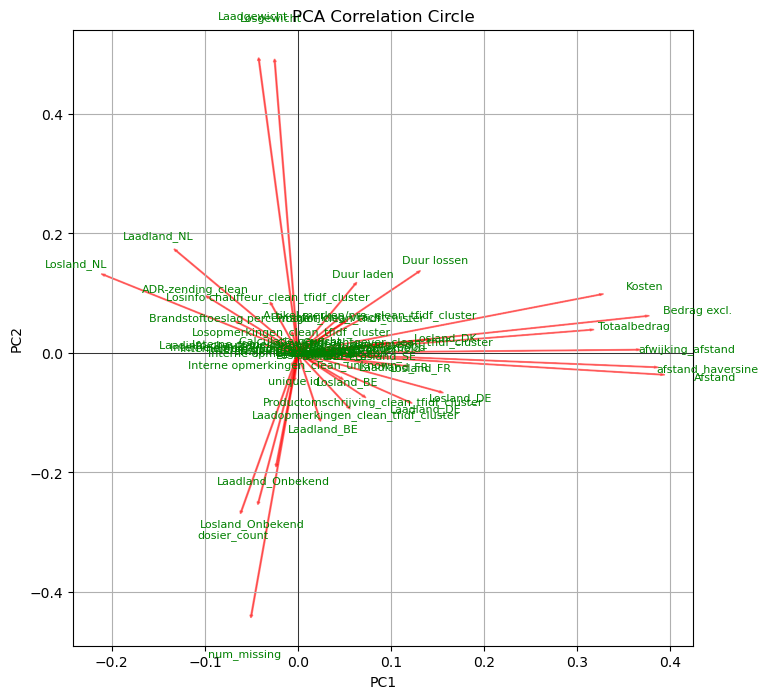

In [46]:
from src.PCA_plot_correlation_circle import pca_correlation_circle

pca_correlation_circle(data)

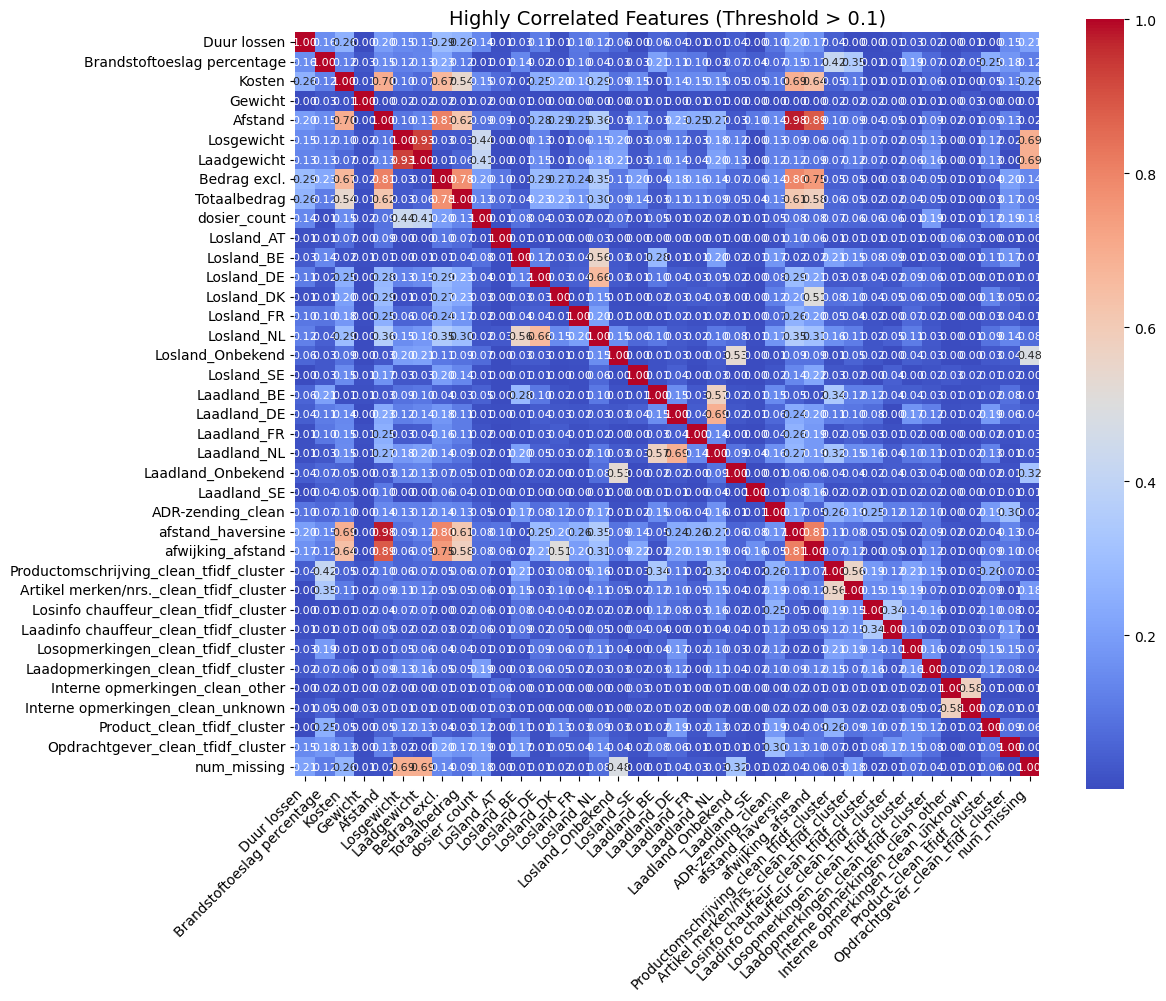

Highly correlated feature pairs:
Afstand and afstand_haversine: 0.98
Losgewicht and Laadgewicht: 0.93
Afstand and afwijking_afstand: 0.89
afstand_haversine and afwijking_afstand: 0.81
Afstand and Bedrag excl.: 0.81
Bedrag excl. and afstand_haversine: 0.80
Bedrag excl. and Totaalbedrag: 0.78
Bedrag excl. and afwijking_afstand: 0.75
Kosten and Afstand: 0.70
Laadgewicht and num_missing: 0.69
Losgewicht and num_missing: 0.69
Kosten and afstand_haversine: 0.69
Laadland_DE and Laadland_NL: 0.69
Kosten and Bedrag excl.: 0.67
Losland_DE and Losland_NL: 0.66
Interne opmerkingen_clean_aangemeld and Interne opmerkingen_clean_unknown: 0.66
Kosten and afwijking_afstand: 0.64
Afstand and Totaalbedrag: 0.62
Totaalbedrag and afstand_haversine: 0.61
Totaalbedrag and afwijking_afstand: 0.58
Interne opmerkingen_clean_other and Interne opmerkingen_clean_unknown: 0.58
Laadland_BE and Laadland_NL: 0.57
Productomschrijving_clean_tfidf_cluster and Artikel merken/nrs._clean_tfidf_cluster: 0.56
Losland_BE and L

In [47]:
from src.PCA_plot_correlation import plot_high_corr

plot_high_corr(data, 0.1)

Print highly correlated features

In [48]:
from src.PCA_list_correlation import high_corr_table

high_corr_table(data, 0.8)

        Feature 1         Feature 2  Correlation
          Afstand afstand_haversine     0.978604
       Losgewicht       Laadgewicht     0.930569
          Afstand afwijking_afstand     0.886484
afstand_haversine afwijking_afstand     0.810940
          Afstand      Bedrag excl.     0.805119


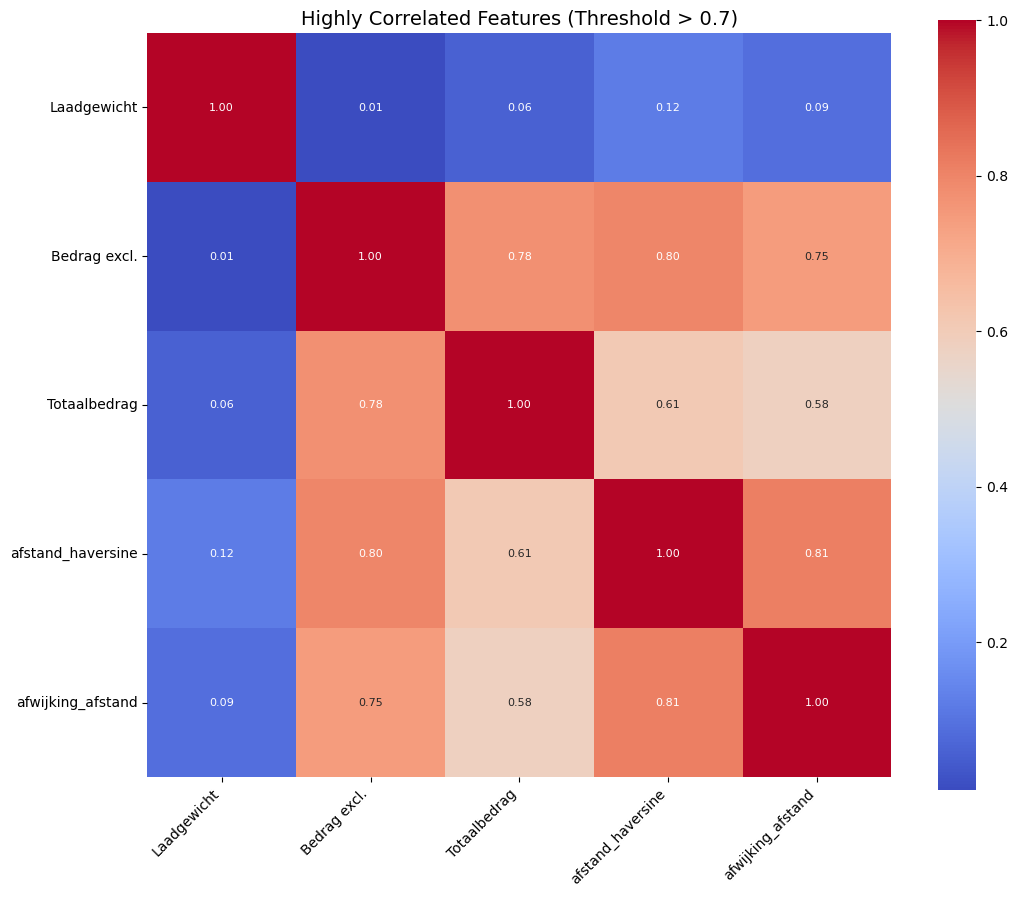

Highly correlated feature pairs:
Afstand and afstand_haversine: 0.98
Losgewicht and Laadgewicht: 0.93
Afstand and afwijking_afstand: 0.89
afstand_haversine and afwijking_afstand: 0.81
Afstand and Bedrag excl.: 0.81
Bedrag excl. and afstand_haversine: 0.80
Bedrag excl. and Totaalbedrag: 0.78
Bedrag excl. and afwijking_afstand: 0.75


In [49]:
from src.PCA_plot_correlation import plot_high_corr

plot_high_corr(data, 0.7)

Selected 37 components to explain 90.0% of variance.


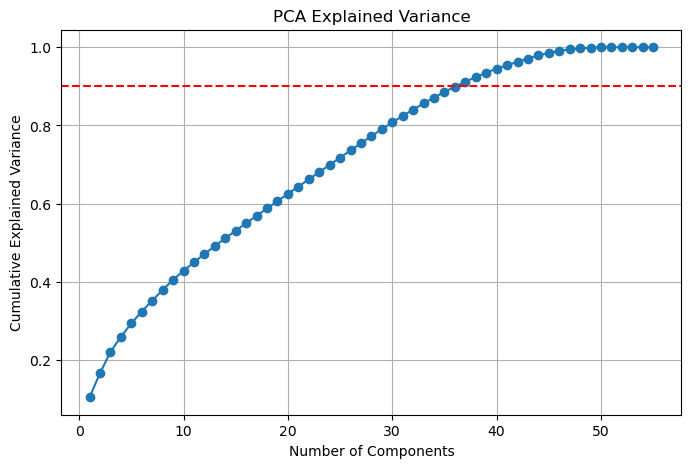

In [50]:
from src.PCA_transform import pca_transform

pca_df, pca_model, scaler = pca_transform(data, variance_threshold=0.90)

In [51]:
kmeans_final = KMeans(n_clusters=100, random_state=RANDOM_STATE)
data['final_cluster'] = kmeans_final.fit_predict(pca_df)

In [52]:

distances = kmeans_final.transform(pca_df)
data['anomaly_score'] = np.min(distances, axis=1)


In [53]:
threshold = data['anomaly_score'].mean() + 3 * data['anomaly_score'].std()
data['is_anomaly'] = data['anomaly_score'] > threshold


In [54]:
data.head(100)

,unique id,Calculatie gewicht,Duur laden,Duur lossen,Brandstoftoeslag percentage,Kosten,afwijking_vracht,Gewicht,Afstand,Losgewicht,...,Interne opmerkingen_clean_lvg aangemeld,Interne opmerkingen_clean_other,Interne opmerkingen_clean_unknown,Interne opmerkingen_clean_nan,Product_clean_tfidf_cluster,Opdrachtgever_clean_tfidf_cluster,num_missing,final_cluster,anomaly_score,is_anomaly
0,1,33100.0,30.0,214.0,12.000000,237.875000,0.0,33000.0,138.125,33088.0,...,False,False,True,False,16,6,0,98,3.264759,False
1,2,33100.0,53.0,134.0,12.000000,166.000000,0.0,33000.0,117.125,33088.0,...,False,False,True,False,0,6,0,0,2.340948,False
2,3,33140.0,64.0,146.0,11.000000,520.500000,0.0,33000.0,117.125,33152.0,...,False,False,True,False,0,6,0,27,2.638741,False
3,4,25520.0,107.0,62.0,10.000000,312.500000,0.0,25000.0,750.500,25456.0,...,False,False,True,False,16,6,0,14,2.687688,False
4,5,34860.0,177.0,70.0,11.000000,0.000000,0.0,34000.0,92.250,34848.0,...,False,False,True,False,17,3,1,58,2.191621,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,34840.0,54.0,66.0,4.921875,9.953125,0.0,35000.0,221.375,35040.0,...,False,False,True,False,6,3,0,67,2.622147,False
96,97,23980.0,231.0,76.0,0.000000,7.890625,0.0,25001.0,144.250,23936.0,...,False,False,True,False,4,5,0,4,2.280332,False
97,98,25100.0,77.0,90.0,11.000000,3800.000000,0.0,25000.0,846.000,25104.0,...,False,False,True,False,3,3,0,3,2.219527,False
98,99,25280.0,56.0,154.0,11.000000,5.160156,0.0,25000.0,219.375,25296.0,...,False,False,True,False,3,3,0,69,2.151415,False


In [55]:
anomalies = data[data['is_anomaly']]
print(len(anomalies))

430


In [56]:
output_path = "./output/baks_anomalies.xlsx"

with pd.ExcelWriter(output_path, engine="openpyxl") as writer:
    anomalies.to_excel(writer, sheet_name="Anomalies", index=False)

Merge output with example from LLM (for now)

In [ ]:
example = pd.read_excel("./output/Example_Output.xlsx")

merged_df = pd.merge(example, dataset, on='unique id', how='inner')
output_path = "./output/baks_example_output.xlsx"

with pd.ExcelWriter(output_path, engine="openpyxl") as writer:
    merged_df.to_excel(writer, sheet_name="Anomalies", index=False)